### Análise Exploratória 
[Jobs and Salaries in Data Science](https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data)

#### Importando os dados

In [147]:
import pandas as pd
from matplotlib import pyplot as plt

In [148]:
data = pd.read_csv('jobs_in_data.csv')

In [149]:
print(f'linhas - {data.shape[0]}\ncolunas - {data.shape[1]}')

linhas - 9355
colunas - 12


In [150]:
data.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

#### Limpeza e preparação dos dados

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [152]:
data.isna().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [153]:
data.head(3)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M


In [154]:
# Convertendo o tipo de dado das colunas
data['work_year'] = data['work_year'].astype('int64')

# Dados categóricos economizam memória e facilitam nas análises
colunas_categoricas = ['job_category', 'experience_level', 'employment_type', 'work_setting', 'company_size']
data[colunas_categoricas] = data[colunas_categoricas].astype('category')

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           9355 non-null   int64   
 1   job_title           9355 non-null   object  
 2   job_category        9355 non-null   category
 3   salary_currency     9355 non-null   object  
 4   salary              9355 non-null   int64   
 5   salary_in_usd       9355 non-null   int64   
 6   employee_residence  9355 non-null   object  
 7   experience_level    9355 non-null   category
 8   employment_type     9355 non-null   category
 9   work_setting        9355 non-null   category
 10  company_location    9355 non-null   object  
 11  company_size        9355 non-null   category
dtypes: category(5), int64(3), object(4)
memory usage: 558.4+ KB


#### Agregação de dados e operações de grupo 1

- agrupando para criar uma tabela dinâmica com as informações de ano, área de atuação e titulo

In [156]:
# Agrupando os dados contando os valores pelo número de ocorrências
grouped = data.groupby(['work_year', 'job_category', 'job_title']).size().reset_index(name='quantidade')

# Ordenando os dados pelo ano, depois pela quantidade de ocorrências
grouped = grouped.sort_values(by=['work_year', 'job_category', 'job_title'], ascending=[True, False, False])

# Filtrando os dados para manter somente valores existentes
grouped = grouped[grouped['quantidade'] > 0]

/tmp/ipykernel_7213/3936800184.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(['work_year', 'job_category', 'job_title']).size().reset_index(name='quantidade')


In [157]:
grouped # Exibindo a tabela

,work_year,job_category,job_title,quantidade
1228,2020,Machine Learning and AI,Machine Learning Scientist,1
1223,2020,Machine Learning and AI,Machine Learning Manager,1
1222,2020,Machine Learning and AI,Machine Learning Infrastructure Engineer,1
1221,2020,Machine Learning and AI,Machine Learning Engineer,4
1218,2020,Machine Learning and AI,ML Engineer,1
...,...,...,...,...
3775,2023,BI and Visualization,Business Intelligence Engineer,144
3774,2023,BI and Visualization,Business Intelligence Developer,16
3772,2023,BI and Visualization,Business Intelligence Analyst,54
3768,2023,BI and Visualization,BI Developer,49


- diferentes formas de filtrar a tabela dinâmica especificando o tipo de busca


In [158]:
# Criando um filtro para visualizar somente os dados de 2023
grouped[grouped['work_year'] == 2023]

,work_year,job_category,job_title,quantidade
4990,2023,Machine Learning and AI,Principal Machine Learning Engineer,2
4985,2023,Machine Learning and AI,NLP Engineer,10
4980,2023,Machine Learning and AI,Machine Learning Specialist,2
4979,2023,Machine Learning and AI,Machine Learning Software Engineer,8
4978,2023,Machine Learning and AI,Machine Learning Scientist,58
...,...,...,...,...
3775,2023,BI and Visualization,Business Intelligence Engineer,144
3774,2023,BI and Visualization,Business Intelligence Developer,16
3772,2023,BI and Visualization,Business Intelligence Analyst,54
3768,2023,BI and Visualization,BI Developer,49


- filtrando somente pela área de atuação

In [159]:
# Criando um filtro para visualizar somente a área desejada 
categoria = 'Data Science and Research'	
grouped[grouped['job_category'] == categoria].tail(5)

,work_year,job_category,job_title,quantidade
4688,2023,Data Science and Research,Data Science Director,4
4687,2023,Data Science and Research,Data Science Consultant,28
4637,2023,Data Science and Research,Applied Scientist,254
4634,2023,Data Science and Research,Applied Data Scientist,4
4629,2023,Data Science and Research,AI Research Engineer,3


- Criando um filtro para vagas de Data Scientist no ano de 2023

In [160]:
filtro = (grouped['job_title'] == 'Data Scientist') & (grouped['work_year'] == 2023) 
grouped[filtro]

,work_year,job_category,job_title,quantidade
4694,2023,Data Science and Research,Data Scientist,1538


- agrupando os dados com as informações de experience_level

In [161]:
# Agrupando os dados contando os valores pelo número de ocorrências
grouped2 = data.groupby(['work_year', 'job_category', 'experience_level']).size().reset_index(name='quantidade')

# Ordenando os dados pelo ano, depois pela quantidade de ocorrência
grouped2 = grouped2.sort_values(['work_year', 'quantidade'], ascending=[True, False])

# Filtrando os dados para manter somente valores existentes
grouped2 = grouped2[grouped2['quantidade'] > 0]

/tmp/ipykernel_7213/593493063.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped2 = data.groupby(['work_year', 'job_category', 'experience_level']).size().reset_index(name='quantidade')


- quantidade vagas por área de atuação e nível de experiência exigido de 2020 até 2023

In [162]:
grouped2.tail(3)

,work_year,job_category,experience_level,quantidade
127,2023,Cloud and Database,Senior,3
144,2023,Data Quality and Operations,Entry-level,3
133,2023,Data Architecture and Modeling,Executive,2


- filtrando somente para vagas de Data Engineering com nível de experiência Senior

In [163]:
filtro2 = (grouped2['job_category'] == 'Data Engineering') & (grouped2['experience_level'] == 'Senior')
grouped2[filtro2]

,work_year,job_category,experience_level,quantidade
19,2020,Data Engineering,Senior,5
59,2021,Data Engineering,Senior,17
99,2022,Data Engineering,Senior,364
139,2023,Data Engineering,Senior,1190


#### Agregação de dados e operações de grupo 2

- agrupando para visualizar informações de salários

In [164]:
# Agrupando os dados contando os valores pelo número de ocorrências
grouped3 = data.groupby(['work_year', 'job_title', 'experience_level', 'salary_in_usd']).size().reset_index(name='quantidade')

# Filtrando os dados para manter somente valores existentes 
grouped3 = grouped3[grouped3['quantidade'] > 0]

/tmp/ipykernel_7213/1879001327.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped3 = data.groupby(['work_year', 'job_title', 'experience_level', 'salary_in_usd']).size().reset_index(name='quantidade')


In [165]:
grouped3.head(10) # Exibindo a tabela dinâmica

,work_year,job_title,experience_level,salary_in_usd,quantidade
35830,2020,AI Scientist,Entry-level,45896,1
100542,2020,Azure Data Engineer,Entry-level,100000,1
118387,2020,BI Data Analyst,Mid-level,98000,1
143162,2020,Big Data Engineer,Entry-level,70000,1
148841,2020,Big Data Engineer,Senior,109024,1
148892,2020,Big Data Engineer,Senior,114047,1
150550,2020,Business Data Analyst,Entry-level,100000,1
154083,2020,Business Data Analyst,Mid-level,95000,1
154460,2020,Business Data Analyst,Mid-level,135000,1
234168,2020,Computer Vision Engineer,Senior,60000,1


- top 10 salários mais altos por tipo de cargo e nível de experiência no ano de 2023

In [166]:
filtro3 = (grouped3['work_year'] == 2023) & (grouped3['experience_level'] == 'Senior') 
grouped3[filtro3].sort_values(by='salary_in_usd', ascending=False).head(10) # ordenando os dados

,work_year,job_title,experience_level,salary_in_usd,quantidade
2743288,2023,Analytics Engineering Manager,Senior,399880,1
3371959,2023,Machine Learning Engineer,Senior,392000,1
3529126,2023,Research Engineer,Senior,385000,1
2936174,2023,Data Analyst,Senior,385000,1
3000470,2023,Data Engineer,Senior,385000,2
3007614,2023,Data Infrastructure Engineer,Senior,385000,1
3350526,2023,ML Engineer,Senior,385000,1
3350525,2023,ML Engineer,Senior,383910,1
2979035,2023,Data Architect,Senior,376080,1
3536264,2023,Research Scientist,Senior,374000,1


#### Visualizações com matplotlib

In [167]:
total_categoria = data['job_category'].value_counts().reset_index(name='quantidade')
total_categoria # Contando a quantidade por categoria e renomeando a coluna

,job_category,quantidade
0,Data Science and Research,3014
1,Data Engineering,2260
2,Data Analysis,1457
3,Machine Learning and AI,1428
4,Leadership and Management,503
5,BI and Visualization,313
6,Data Architecture and Modeling,259
7,Data Management and Strategy,61
8,Data Quality and Operations,55
9,Cloud and Database,5


In [168]:
nivel_experiencia = data['experience_level'].value_counts().reset_index(name='quantidade')
nivel_experiencia # Contando a quantidade por categoria e renomeando a coluna

,experience_level,quantidade
0,Senior,6709
1,Mid-level,1869
2,Entry-level,496
3,Executive,281


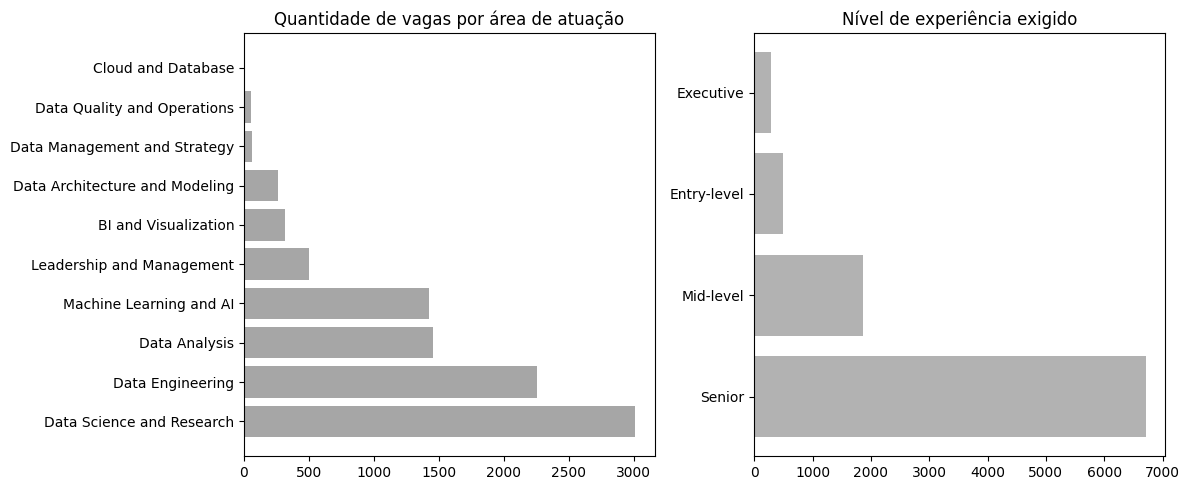

In [169]:
# Definindo os subplots
plt.figure(figsize=(12, 5))

# Subplot 1
plt.subplot(1, 2, 1)  # Uma linha, duas colunas, primeiro subplot
plt.barh(total_categoria['job_category'], total_categoria['quantidade'], color='grey', alpha=0.7)
plt.title('Quantidade de vagas por área de atuação')

# Subplot 2
plt.subplot(1, 2, 2)  # Uma linha, duas colunas, segundo subplot
plt.barh(nivel_experiencia['experience_level'], nivel_experiencia['quantidade'], color='grey', alpha=0.6)
plt.title('Nível de experiência exigido')

plt.tight_layout()  # Ajusta automaticamente a disposição dos subplots para evitar sobreposição
plt.show()